This document contains the procedure to clean the satellite data. The first step is to find the missing and duplicate images; for that, we calculated the number of images for each month. To execute the code mentioned in this notebook, place it in the images folder, as shown below.

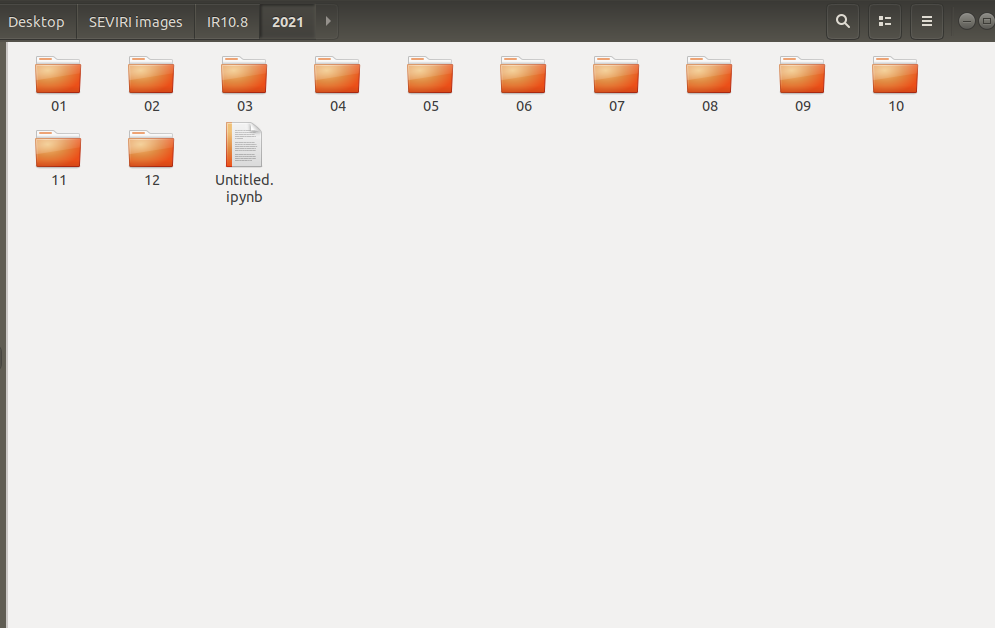



Number of days in one year: 365

Number of days in each month:  [31, 28,  31, 30, 31, 30, 31, 31, 30,  31, 30,  31]

Number of images in one day: 96

Total number of images: 96x365 = 35040


In [7]:
totalimages = 0
count=1
for loop in [31, 28,  31, 30, 31, 30, 31, 31, 30,  31, 30,  31]:
    print("Expected images in Month: ",count," = ",loop*96)
    totalimages = totalimages + loop*96
    count= count+1
print("Expected Total number of images", totalimages)

Expected images in Month:  1  =  2976
Expected images in Month:  2  =  2688
Expected images in Month:  3  =  2976
Expected images in Month:  4  =  2880
Expected images in Month:  5  =  2976
Expected images in Month:  6  =  2880
Expected images in Month:  7  =  2976
Expected images in Month:  8  =  2976
Expected images in Month:  9  =  2880
Expected images in Month:  10  =  2976
Expected images in Month:  11  =  2880
Expected images in Month:  12  =  2976
Expected Total number of images 35040


The next step is calculating the actual number of images we have each month.


In [10]:
import pandas as pd
import numpy as np
import os


months = os.listdir("./")
months = sorted_nicely(months)
sum = 0
daysum = 0
numberofdaysinmonth = [31, 28,  31, 30, 31, 30, 31, 31, 30,  31, 30,  31]
timestamps = ['0000', '0015', '0030', '0045', '0100', '0115', '0130', '0145', '0200', '0215', '0230', '0245', '0300', '0315', '0330', '0345', '0400', '0415', '0430', '0445', '0500', '0515', '0530', '0545', '0600', '0615', '0630', '0645', '0700', '0715', '0730', '0745', '0800', '0815', '0830', '0845', '0900', '0915', '0930', '0945', '1000', '1015', '1030', '1045', '1100', '1115', '1130', '1145', '1200', '1215', '1230', '1245', '1300', '1315', '1330', '1345', '1400', '1415', '1430', '1445', '1500', '1515', '1530', '1545', '1600', '1615', '1630', '1645', '1700', '1715', '1730', '1745', '1800', '1815', '1830', '1845', '1900', '1915', '1930', '1945', '2000', '2015', '2030', '2045', '2100', '2115', '2130', '2145', '2200', '2215', '2230', '2245', '2300', '2315', '2330', '2345']
count=0
 
for m in months:
    if "blank" not in m and".ipynb" not in m and ".py" not in m and ".csv" not in m and "01_croped" not in m and ".txt" not in m and ".ipynb_checkpoints" not in m:
        images = os.listdir(m)
        images = sorted_nicely(images)
        sum = sum +len(images)
        daysum = daysum + len(images)/96
        print("Actual images in Month: ",m,"Number of images: ",len(images))            
        count=count+1        

print("Actual Total number of images", sum)


Actual images in Month:  01 Number of images:  2972
Actual images in Month:  02 Number of images:  2686
Actual images in Month:  03 Number of images:  2978
Actual images in Month:  04 Number of images:  2880
Actual images in Month:  05 Number of images:  2992
Actual images in Month:  06 Number of images:  2880
Actual images in Month:  07 Number of images:  2975
Actual images in Month:  08 Number of images:  2976
Actual images in Month:  09 Number of images:  2877
Actual images in Month:  10 Number of images:  2972
Actual images in Month:  11 Number of images:  2879
Actual images in Month:  12 Number of images:  2952
Actual Total number of images 35019


Actual Total number of images = 35019

Expected Total number of images = 35040

The next step is to calculate the number of images for each day.

A positive number means images are missing, and a negative number shows there is a duplicate image for a particular timestamp.


In [13]:
def sorted_nicely( l ):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key = alphanum_key)

months = os.listdir("./")
months = sorted_nicely(months)
sum = 0
daysum = 0
numberofdaysinmonth = [31, 28,  31, 30, 31, 30, 31, 31, 30,  31, 30,  31]
timestamps = ['0000', '0015', '0030', '0045', '0100', '0115', '0130', '0145', '0200', '0215', '0230', '0245', '0300', '0315', '0330', '0345', '0400', '0415', '0430', '0445', '0500', '0515', '0530', '0545', '0600', '0615', '0630', '0645', '0700', '0715', '0730', '0745', '0800', '0815', '0830', '0845', '0900', '0915', '0930', '0945', '1000', '1015', '1030', '1045', '1100', '1115', '1130', '1145', '1200', '1215', '1230', '1245', '1300', '1315', '1330', '1345', '1400', '1415', '1430', '1445', '1500', '1515', '1530', '1545', '1600', '1615', '1630', '1645', '1700', '1715', '1730', '1745', '1800', '1815', '1830', '1845', '1900', '1915', '1930', '1945', '2000', '2015', '2030', '2045', '2100', '2115', '2130', '2145', '2200', '2215', '2230', '2245', '2300', '2315', '2330', '2345']
count=0
 
for m in months:
    if "blank" not in m and".ipynb" not in m and ".py" not in m and ".csv" not in m and "01_croped" not in m and ".txt" not in m and ".ipynb_checkpoints" not in m:
        images = os.listdir(m)
        images = sorted_nicely(images)
        sum = sum +len(images)
        daysum = daysum + len(images)/96
        print("Month: ",m,"Number of images: ",len(images))    
        
        for loop in range(1,numberofdaysinmonth[count]+1):
            if int(loop/10)==0:
                matching = [s for s in images if "0"+str(loop)+"-"+m+"-2021_" in s]
                print("Day: ",loop, "Number of images: ",len(matching), "Number of missing images: ",96 - len(matching))
            else:
                matching = [s for s in images if str(loop)+"-"+m+"-2021_" in s]
                print("Day: ",loop, "Number of images: ",len(matching), "Number of missing images: ",96 - len(matching))
        
        count=count+1        

Month:  01 Number of images:  2972
Day:  1 Number of images:  96 Number of missing images:  0
Day:  2 Number of images:  96 Number of missing images:  0
Day:  3 Number of images:  96 Number of missing images:  0
Day:  4 Number of images:  96 Number of missing images:  0
Day:  5 Number of images:  96 Number of missing images:  0
Day:  6 Number of images:  96 Number of missing images:  0
Day:  7 Number of images:  96 Number of missing images:  0
Day:  8 Number of images:  96 Number of missing images:  0
Day:  9 Number of images:  96 Number of missing images:  0
Day:  10 Number of images:  96 Number of missing images:  0
Day:  11 Number of images:  96 Number of missing images:  0
Day:  12 Number of images:  96 Number of missing images:  0
Day:  13 Number of images:  96 Number of missing images:  0
Day:  14 Number of images:  96 Number of missing images:  0
Day:  15 Number of images:  96 Number of missing images:  0
Day:  16 Number of images:  96 Number of missing images:  0
Day:  17 Numbe

Day:  11 Number of images:  96 Number of missing images:  0
Day:  12 Number of images:  96 Number of missing images:  0
Day:  13 Number of images:  96 Number of missing images:  0
Day:  14 Number of images:  96 Number of missing images:  0
Day:  15 Number of images:  96 Number of missing images:  0
Day:  16 Number of images:  96 Number of missing images:  0
Day:  17 Number of images:  96 Number of missing images:  0
Day:  18 Number of images:  96 Number of missing images:  0
Day:  19 Number of images:  96 Number of missing images:  0
Day:  20 Number of images:  96 Number of missing images:  0
Day:  21 Number of images:  95 Number of missing images:  1
Day:  22 Number of images:  96 Number of missing images:  0
Day:  23 Number of images:  96 Number of missing images:  0
Day:  24 Number of images:  96 Number of missing images:  0
Day:  25 Number of images:  96 Number of missing images:  0
Day:  26 Number of images:  96 Number of missing images:  0
Day:  27 Number of images:  96 Number of

The next step is to find the missing/duplicate timestamp information for each month and day.

First, find the duplicate images.

There is an extra timestamp in the images. (2nd-row last column)

We have to remove all the extra timestamp information to have 96 images for each day.

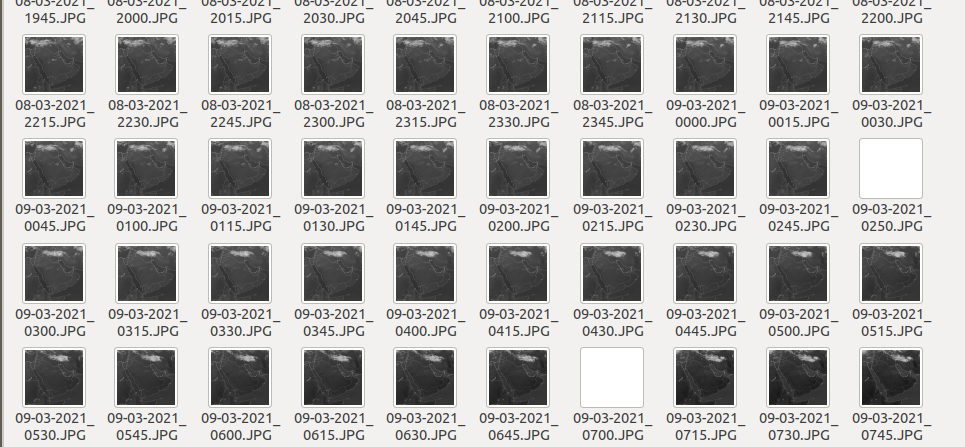



Also, remove the images containing .tmp, as shown below.

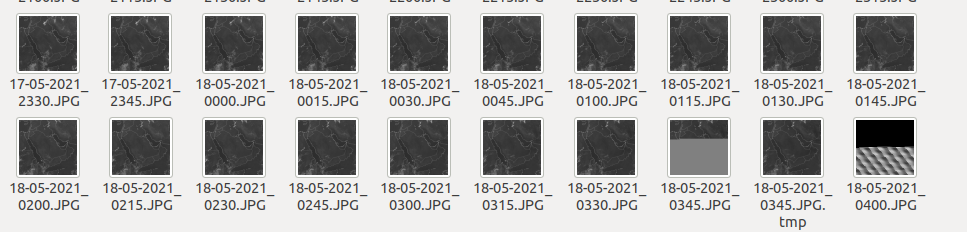



In [6]:
import pandas as pd
import numpy as np
import os
import re

def sorted_nicely( l ):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key = alphanum_key)

months = os.listdir("./")
months = sorted_nicely(months)
sum = 0
daysum = 0
numberofdaysinmonth = [31, 28,  31, 30, 31, 30, 31, 31, 30,  31, 30,  31]
timestamps = ['0000', '0015', '0030', '0045', '0100', '0115', '0130', '0145', '0200', '0215', '0230', '0245', '0300', '0315', '0330', '0345', '0400', '0415', '0430', '0445', '0500', '0515', '0530', '0545', '0600', '0615', '0630', '0645', '0700', '0715', '0730', '0745', '0800', '0815', '0830', '0845', '0900', '0915', '0930', '0945', '1000', '1015', '1030', '1045', '1100', '1115', '1130', '1145', '1200', '1215', '1230', '1245', '1300', '1315', '1330', '1345', '1400', '1415', '1430', '1445', '1500', '1515', '1530', '1545', '1600', '1615', '1630', '1645', '1700', '1715', '1730', '1745', '1800', '1815', '1830', '1845', '1900', '1915', '1930', '1945', '2000', '2015', '2030', '2045', '2100', '2115', '2130', '2145', '2200', '2215', '2230', '2245', '2300', '2315', '2330', '2345']
count=0

for m in months:
    if "blank" not in m and".ipynb" not in m and ".py" not in m and ".csv" not in m and "01_croped" not in m and ".txt" not in m and ".ipynb_checkpoints" not in m:
        temp = []
        images = os.listdir(m)
        images = np.array(images)
        print("Month: ",m,"Number of images: ",len(images))    
        for loop2 in timestamps:
            temp.extend([s for s in images if loop2  in s])   
        temp = list(set(images) - set(temp))
        print("Unwanted timestamps")
        print(temp)
        temp = [s for s in images if ".JPG.tmp"  in s]
        print("Duplicate files containing TMP")
        print(temp)

Month:  01 Number of images:  2972
Unwanted timestamps
[]
Duplicate files containing TMP
[]
Month:  02 Number of images:  2686
Unwanted timestamps
[]
Duplicate files containing TMP
[]
Month:  03 Number of images:  2978
Unwanted timestamps
['11-03-2021_1905.JPG', '13-03-2021_1520.JPG', '14-03-2021_1125.JPG', '09-03-2021_0250.JPG', '10-03-2021_0750.JPG']
Duplicate files containing TMP
[]
Month:  04 Number of images:  2880
Unwanted timestamps
[]
Duplicate files containing TMP
[]
Month:  05 Number of images:  2992
Unwanted timestamps
['18-05-2021_0610.JPG.tmp', '18-05-2021_0610.JPG']
Duplicate files containing TMP
['18-05-2021_0800.JPG.tmp', '18-05-2021_0445.JPG.tmp', '18-05-2021_0630.JPG.tmp', '18-05-2021_0530.JPG.tmp', '18-05-2021_0615.JPG.tmp', '18-05-2021_0600.JPG.tmp', '18-05-2021_0700.JPG.tmp', '18-05-2021_0745.JPG.tmp', '18-05-2021_0545.JPG.tmp', '18-05-2021_0645.JPG.tmp', '18-05-2021_0415.JPG.tmp', '18-05-2021_0610.JPG.tmp', '18-05-2021_0345.JPG.tmp', '18-05-2021_0400.JPG.tmp', '18

The next step is to remove these unwanted timestamp images and .tmp images and verify that all duplicate information is removed.

In [10]:
import pandas as pd
import numpy as np
import os
import re

def sorted_nicely( l ):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key = alphanum_key)

months = os.listdir("./")
months = sorted_nicely(months)
sum = 0
daysum = 0
numberofdaysinmonth = [31, 28,  31, 30, 31, 30, 31, 31, 30,  31, 30,  31]
timestamps = ['0000', '0015', '0030', '0045', '0100', '0115', '0130', '0145', '0200', '0215', '0230', '0245', '0300', '0315', '0330', '0345', '0400', '0415', '0430', '0445', '0500', '0515', '0530', '0545', '0600', '0615', '0630', '0645', '0700', '0715', '0730', '0745', '0800', '0815', '0830', '0845', '0900', '0915', '0930', '0945', '1000', '1015', '1030', '1045', '1100', '1115', '1130', '1145', '1200', '1215', '1230', '1245', '1300', '1315', '1330', '1345', '1400', '1415', '1430', '1445', '1500', '1515', '1530', '1545', '1600', '1615', '1630', '1645', '1700', '1715', '1730', '1745', '1800', '1815', '1830', '1845', '1900', '1915', '1930', '1945', '2000', '2015', '2030', '2045', '2100', '2115', '2130', '2145', '2200', '2215', '2230', '2245', '2300', '2315', '2330', '2345']
count=0

for m in months:
    if "blank" not in m and".ipynb" not in m and ".py" not in m and ".csv" not in m and "01_croped" not in m and ".txt" not in m and ".ipynb_checkpoints" not in m:
        temp = []
        images = os.listdir(m)
        images = np.array(images)
        print("Month: ",m,"Number of images: ",len(images))    
        for loop2 in timestamps:
            temp.extend([s for s in images if loop2  in s])   
        temp = list(set(images) - set(temp))
        try:
            for tempfile in temp:
                os.remove(m+"/"+tempfile)
            temp = [s for s in images if ".JPG.tmp"  in s]
            for tempfile in temp:
                os.remove(m+"/"+tempfile)
        except:
            print("Directory is cleaned!")
# Verify that there is no negative number to ensure all the duplicate information is removed.
        
months = os.listdir("./")
months = sorted_nicely(months)
sum = 0
daysum = 0
numberofdaysinmonth = [31, 28,  31, 30, 31, 30, 31, 31, 30,  31, 30,  31]
timestamps = ['0000', '0015', '0030', '0045', '0100', '0115', '0130', '0145', '0200', '0215', '0230', '0245', '0300', '0315', '0330', '0345', '0400', '0415', '0430', '0445', '0500', '0515', '0530', '0545', '0600', '0615', '0630', '0645', '0700', '0715', '0730', '0745', '0800', '0815', '0830', '0845', '0900', '0915', '0930', '0945', '1000', '1015', '1030', '1045', '1100', '1115', '1130', '1145', '1200', '1215', '1230', '1245', '1300', '1315', '1330', '1345', '1400', '1415', '1430', '1445', '1500', '1515', '1530', '1545', '1600', '1615', '1630', '1645', '1700', '1715', '1730', '1745', '1800', '1815', '1830', '1845', '1900', '1915', '1930', '1945', '2000', '2015', '2030', '2045', '2100', '2115', '2130', '2145', '2200', '2215', '2230', '2245', '2300', '2315', '2330', '2345']
count=0
 
for m in months:
    if "blank" not in m and".ipynb" not in m and ".py" not in m and ".csv" not in m and "01_croped" not in m and ".txt" not in m and ".ipynb_checkpoints" not in m:
        images = os.listdir(m)
        images = sorted_nicely(images)
        sum = sum +len(images)
        daysum = daysum + len(images)/96
        print("Month: ",m,"Number of images: ",len(images))    
        
        for loop in range(1,numberofdaysinmonth[count]+1):
            if int(loop/10)==0:
                matching = [s for s in images if "0"+str(loop)+"-"+m+"-2021_" in s]
                print("Day: ",loop, "Number of images: ",len(matching), "Number of missing images: ",96 - len(matching))
            else:
                matching = [s for s in images if str(loop)+"-"+m+"-2021_" in s]
                print("Day: ",loop, "Number of images: ",len(matching), "Number of missing images: ",96 - len(matching))
        
        count=count+1    
        
        

Month:  01 Number of images:  2972
Month:  02 Number of images:  2686
Month:  03 Number of images:  2973
Month:  04 Number of images:  2880
Month:  05 Number of images:  2979
Month:  06 Number of images:  2880
Month:  07 Number of images:  2975
Month:  08 Number of images:  2976
Month:  09 Number of images:  2877
Month:  10 Number of images:  2972
Month:  11 Number of images:  2879
Month:  12 Number of images:  2952
Month:  01 Number of images:  2972
Day:  1 Number of images:  96 Number of missing images:  0
Day:  2 Number of images:  96 Number of missing images:  0
Day:  3 Number of images:  96 Number of missing images:  0
Day:  4 Number of images:  96 Number of missing images:  0
Day:  5 Number of images:  96 Number of missing images:  0
Day:  6 Number of images:  96 Number of missing images:  0
Day:  7 Number of images:  96 Number of missing images:  0
Day:  8 Number of images:  96 Number of missing images:  0
Day:  9 Number of images:  96 Number of missing images:  0
Day:  10 Numbe

Day:  23 Number of images:  96 Number of missing images:  0
Day:  24 Number of images:  96 Number of missing images:  0
Day:  25 Number of images:  96 Number of missing images:  0
Day:  26 Number of images:  96 Number of missing images:  0
Day:  27 Number of images:  96 Number of missing images:  0
Day:  28 Number of images:  96 Number of missing images:  0
Day:  29 Number of images:  96 Number of missing images:  0
Day:  30 Number of images:  96 Number of missing images:  0
Day:  31 Number of images:  96 Number of missing images:  0
Month:  08 Number of images:  2976
Day:  1 Number of images:  96 Number of missing images:  0
Day:  2 Number of images:  96 Number of missing images:  0
Day:  3 Number of images:  96 Number of missing images:  0
Day:  4 Number of images:  96 Number of missing images:  0
Day:  5 Number of images:  96 Number of missing images:  0
Day:  6 Number of images:  96 Number of missing images:  0
Day:  7 Number of images:  96 Number of missing images:  0
Day:  8 Numb

The next step is to find the missing timestamps images.

In [12]:
sum = 0
daysum = 0
numberofdaysinmonth = [31, 28,  31, 30, 31, 30, 31, 31, 30,  31, 30,  31]
timestamps = ['0000', '0015', '0030', '0045', '0100', '0115', '0130', '0145', '0200', '0215', '0230', '0245', '0300', '0315', '0330', '0345', '0400', '0415', '0430', '0445', '0500', '0515', '0530', '0545', '0600', '0615', '0630', '0645', '0700', '0715', '0730', '0745', '0800', '0815', '0830', '0845', '0900', '0915', '0930', '0945', '1000', '1015', '1030', '1045', '1100', '1115', '1130', '1145', '1200', '1215', '1230', '1245', '1300', '1315', '1330', '1345', '1400', '1415', '1430', '1445', '1500', '1515', '1530', '1545', '1600', '1615', '1630', '1645', '1700', '1715', '1730', '1745', '1800', '1815', '1830', '1845', '1900', '1915', '1930', '1945', '2000', '2015', '2030', '2045', '2100', '2115', '2130', '2145', '2200', '2215', '2230', '2245', '2300', '2315', '2330', '2345']
count=0

for m in months:
    if "blank" not in m and".ipynb" not in m and ".py" not in m and ".csv" not in m and "01_croped" not in m and ".txt" not in m and ".ipynb_checkpoints" not in m:
        images = os.listdir(m)
        images = sorted_nicely(images)
        sum = sum +len(images)
        daysum = daysum + len(images)/96
        print("Month: ",m,"Number of images: ",len(images))    
        
        for loop in range(1,numberofdaysinmonth[count]+1):
            if int(loop/10)==0:
                matching = [s for s in images if "0"+str(loop)+"-"+m+"-2021_" in s]
                temp  =  [] 
                for loop2 in timestamps:
                    temp = [s for s in matching if loop2 in s]
                    if len(temp)!=1:
                        missingfilename =  "0"+str(loop)+"-"+m+"-2021_"+loop2+".JPG"
                        print(missingfilename)
            else:
                matching = [s for s in images if str(loop)+"-"+m+"-2021_" in s]
                temp  =  [] 
                for loop2 in timestamps:
                    temp = [s for s in matching if loop2 in s]
                    if len(temp)!=1:
                        missingfilename =  str(loop)+"-"+m+"-2021_"+loop2+".JPG"
                        print(missingfilename)
        count=count+1       

Month:  01 Number of images:  2972
21-01-2021_0445.JPG
21-01-2021_0500.JPG
21-01-2021_0515.JPG
24-01-2021_0400.JPG
Month:  02 Number of images:  2686
17-02-2021_0945.JPG
17-02-2021_1000.JPG
Month:  03 Number of images:  2973
05-03-2021_1430.JPG
28-03-2021_0445.JPG
28-03-2021_0500.JPG
Month:  04 Number of images:  2880
Month:  05 Number of images:  2972
18-05-2021_0515.JPG
22-05-2021_1830.JPG
22-05-2021_1845.JPG
22-05-2021_1900.JPG
Month:  06 Number of images:  2880
Month:  07 Number of images:  2975
21-07-2021_1300.JPG
Month:  08 Number of images:  2976
Month:  09 Number of images:  2877
15-09-2021_0815.JPG
20-09-2021_0600.JPG
20-09-2021_0615.JPG
Month:  10 Number of images:  2972
08-10-2021_1145.JPG
08-10-2021_1200.JPG
08-10-2021_1245.JPG
09-10-2021_1145.JPG
Month:  11 Number of images:  2879
28-11-2021_1415.JPG
Month:  12 Number of images:  2952
15-12-2021_1445.JPG
15-12-2021_1500.JPG
15-12-2021_1515.JPG
15-12-2021_1530.JPG
15-12-2021_1545.JPG
15-12-2021_1600.JPG
15-12-2021_1615.JPG


To handle this issue, we created a blank image and replaced it with the specific timestamps. The blank image is also included in the directory.

In [17]:
import shutil
sum = 0
daysum = 0
numberofdaysinmonth = [31, 28,  31, 30, 31, 30, 31, 31, 30,  31, 30,  31]
timestamps = ['0000', '0015', '0030', '0045', '0100', '0115', '0130', '0145', '0200', '0215', '0230', '0245', '0300', '0315', '0330', '0345', '0400', '0415', '0430', '0445', '0500', '0515', '0530', '0545', '0600', '0615', '0630', '0645', '0700', '0715', '0730', '0745', '0800', '0815', '0830', '0845', '0900', '0915', '0930', '0945', '1000', '1015', '1030', '1045', '1100', '1115', '1130', '1145', '1200', '1215', '1230', '1245', '1300', '1315', '1330', '1345', '1400', '1415', '1430', '1445', '1500', '1515', '1530', '1545', '1600', '1615', '1630', '1645', '1700', '1715', '1730', '1745', '1800', '1815', '1830', '1845', '1900', '1915', '1930', '1945', '2000', '2015', '2030', '2045', '2100', '2115', '2130', '2145', '2200', '2215', '2230', '2245', '2300', '2315', '2330', '2345']
count=0

for m in months:
    if "blank" not in m and".ipynb" not in m and ".py" not in m and ".csv" not in m and "01_croped" not in m and ".txt" not in m and ".ipynb_checkpoints" not in m:
        images = os.listdir(m)
        images = sorted_nicely(images)
        sum = sum +len(images)
        daysum = daysum + len(images)/96
        print("Month: ",m,"Number of images: ",len(images))    
        
        for loop in range(1,numberofdaysinmonth[count]+1):
            if int(loop/10)==0:
                matching = [s for s in images if "0"+str(loop)+"-"+m+"-2021_" in s]
                temp  =  [] 
                for loop2 in timestamps:
                    temp = [s for s in matching if loop2 in s]
                    if len(temp)!=1:
                        missingfilename =  "0"+str(loop)+"-"+m+"-2021_"+loop2+".JPG"
                        try:
                            shutil.copyfile("blankimage.JPG", m+"/"+missingfilename)
                        except:
                            print("File already exist")
            else:
                matching = [s for s in images if str(loop)+"-"+m+"-2021_" in s]
                temp  =  [] 
                for loop2 in timestamps:
                    temp = [s for s in matching if loop2 in s]
                    if len(temp)!=1:
                        missingfilename =  str(loop)+"-"+m+"-2021_"+loop2+".JPG"
                        try:
                            shutil.copyfile("blankimage.JPG", m+"/"+missingfilename)
                        except:
                            print("File already exist")
        count=count+1       

Month:  01 Number of images:  2976
Month:  02 Number of images:  2688
Month:  03 Number of images:  2976
Month:  04 Number of images:  2880
Month:  05 Number of images:  2976
Month:  06 Number of images:  2880
Month:  07 Number of images:  2976
Month:  08 Number of images:  2976
Month:  09 Number of images:  2880
Month:  10 Number of images:  2976
Month:  11 Number of images:  2880
Month:  12 Number of images:  2976


The final step is to verify the total number of images.

In [18]:
import pandas as pd
import numpy as np
import os


months = os.listdir("./")
months = sorted_nicely(months)
sum = 0
daysum = 0
numberofdaysinmonth = [31, 28,  31, 30, 31, 30, 31, 31, 30,  31, 30,  31]
timestamps = ['0000', '0015', '0030', '0045', '0100', '0115', '0130', '0145', '0200', '0215', '0230', '0245', '0300', '0315', '0330', '0345', '0400', '0415', '0430', '0445', '0500', '0515', '0530', '0545', '0600', '0615', '0630', '0645', '0700', '0715', '0730', '0745', '0800', '0815', '0830', '0845', '0900', '0915', '0930', '0945', '1000', '1015', '1030', '1045', '1100', '1115', '1130', '1145', '1200', '1215', '1230', '1245', '1300', '1315', '1330', '1345', '1400', '1415', '1430', '1445', '1500', '1515', '1530', '1545', '1600', '1615', '1630', '1645', '1700', '1715', '1730', '1745', '1800', '1815', '1830', '1845', '1900', '1915', '1930', '1945', '2000', '2015', '2030', '2045', '2100', '2115', '2130', '2145', '2200', '2215', '2230', '2245', '2300', '2315', '2330', '2345']
count=0
 
for m in months:
    if "blank" not in m and".ipynb" not in m and ".py" not in m and ".csv" not in m and "01_croped" not in m and ".txt" not in m and ".ipynb_checkpoints" not in m:
        images = os.listdir(m)
        images = sorted_nicely(images)
        sum = sum +len(images)
        daysum = daysum + len(images)/96
        print("Actual images in Month: ",m,"Number of images: ",len(images))            
        count=count+1        

print("Actual Total number of images", sum)

Actual images in Month:  01 Number of images:  2976
Actual images in Month:  02 Number of images:  2688
Actual images in Month:  03 Number of images:  2976
Actual images in Month:  04 Number of images:  2880
Actual images in Month:  05 Number of images:  2976
Actual images in Month:  06 Number of images:  2880
Actual images in Month:  07 Number of images:  2976
Actual images in Month:  08 Number of images:  2976
Actual images in Month:  09 Number of images:  2880
Actual images in Month:  10 Number of images:  2976
Actual images in Month:  11 Number of images:  2880
Actual images in Month:  12 Number of images:  2976
Actual Total number of images 35040


Data is Clean!!!